In [1]:
original_file = 'titanic-data.csv'

# Data Dictionary

|Variable	|Definition	     |Key                |
|-----------|:---------------|:------------------|
|PassengerId|                |                   |
|survival	|Survival	     |0 = No, 1 = Yes    |
|pclass	    |Ticket class	 |1 = 1st, 2 = 2nd, 3 = 3rd|
|Name       |Name            |                   |
|sex	    |Sex	         |                   |
|Age	    |Age in years	 |                   |
|sibsp	    |# of siblings / spouses aboard the Titanic	| |
|parch	    |# of parents / children aboard the Titanic	| |
|ticket	    |Ticket number	 | |
|fare	    |Passenger fare	 | |
|cabin	    |Cabin number	 | |
|embarked	|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


# Variable Notes

__pclass__: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

__age__: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp__: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

__parch__: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


from [Kaggle](https://www.kaggle.com/c/titanic/data)

# 提出假设：哪些因素让船上的人生还率更高？

+ 是否社会地位更高的人，生还率更高？通过Pclass间接推测社会地位
+ 儿童和妇女是否生还率更高？猜测救援的时候，儿童和妇女可能会得到更多的照顾。通过Sex和Age来计算乘客的性别和年龄
+ 有亲属同船的，是否生还率更高？亲属越多生还率越高吗？猜测亲属在救援的时候，会互相帮助，从而增加生还率。通过SibSp和Parch推测亲属的数量

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# 导入原始数据
passenger_df = pd.read_csv(original_file)

passenger_df.shape[0]

891

# 问题1: 是否社会地位更高的人，生还率更高？

Populating the interactive namespace from numpy and matplotlib


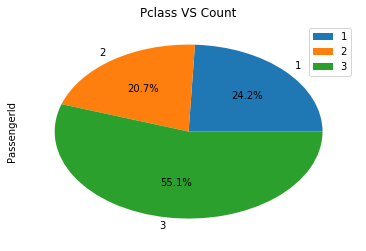

In [4]:
# 船上各pclass人群分布

def pie_chart(data, point, title, labels=None):
    %pylab inline
    data.groupby(point)['PassengerId'].count().plot(kind='pie', 
                                                    autopct='%.1f%%')
    plt.title(title)
    plt.legend(labels=labels, loc='best')
    return None
    
pie_chart(passenger_df, 'Pclass', 'Pclass VS Count')

In [5]:
def bar_chart(data_of_series, title, ylabel):
    %pylab inline
    data_of_series.plot(kind='bar')
    plt.title(title)
    plt.ylabel(ylabel)
    # 添加数据标签
    x=np.arange(len(data_of_series)) # x轴柱子个数  
    y=data_of_series.values # 设置y轴的数值   
    for (a,b) in zip(x,y):
        plt.text(a, b, b, ha='center', va= 'bottom')  
    return None

In [6]:
def survival_rate(data, point):
    # 因为survived变量的值为0/1，所以直接对其求平均值就能够得到存活率
    return data.groupby(point)['Survived'].mean()

survived_rate_by_pclass = survival_rate(passenger_df,'Pclass')

# 数值画在柱形图中小数位数太多，四舍五入到2位小数
survived_rate_by_pclass = survived_rate_by_pclass.round(2)
survived_rate_by_pclass

Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

Populating the interactive namespace from numpy and matplotlib


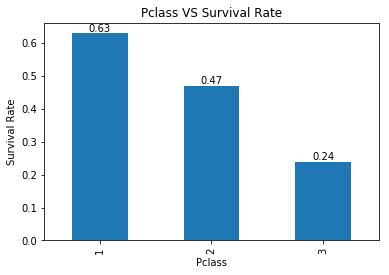

In [7]:
# 可视化

bar_chart(survived_rate_by_pclass, 
          'Pclass VS Survival Rate', 
          'Survival Rate')

问题1小结：

+ 船上已三等舱乘客为主，占55.1%
+ 根据现有数据，生还率会随着船票等级（Pclass）的提高而提高
+ 船票等级__间接__反应乘客的社会地位，但不一定船票等级越高社会地位一定越高


# 问题2: 儿童和妇女是否生还率更高？

In [8]:
age_max = passenger_df['Age'].max()
age_min = passenger_df['Age'].min()
print 'The max of age is {}, and the min is {}'.format(age_max, age_min)

# 所以将年龄段从0-80岁，10岁为一个年龄段，划分为8段
bins = np.arange(0, 90, 10)

# 剔除空数据
age_and_sex = passenger_df[['PassengerId','Sex','Age','Survived']].dropna()
print "The left data has {} rows".format(age_and_sex.shape[0])

# 增加年龄段一列
age_and_sex['Age_division'] = pd.cut(age_and_sex['Age'], bins)

The max of age is 80.0, and the min is 0.42
The left data has 714 rows


Populating the interactive namespace from numpy and matplotlib


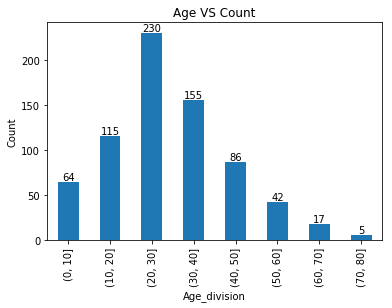

In [9]:
# 船上各年龄段人群分布
num_of_age = age_and_sex.groupby('Age_division')['PassengerId'].count()
bar_chart(num_of_age, 'Age VS Count', 'Count')

In [10]:
# 计算各年龄段的存活率

survived_rate_by_age_division = survival_rate(age_and_sex,'Age_division')
survived_rate_by_age_division

Age_division
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

Populating the interactive namespace from numpy and matplotlib


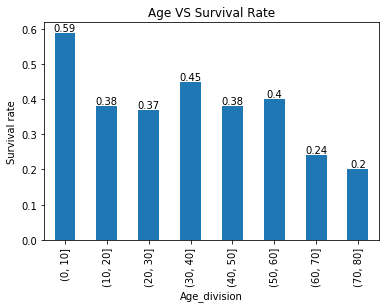

In [11]:
survived_rate_by_age_division = survived_rate_by_age_division.round(2) 
bar_chart(survived_rate_by_age_division, 
          'Age VS Survival Rate', 'Survival rate')

Populating the interactive namespace from numpy and matplotlib


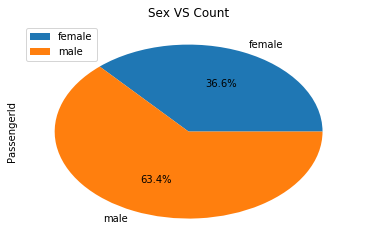

In [12]:
# 船上各性别人群分布

pie_chart(age_and_sex, 'Sex', 'Sex VS Count')

Populating the interactive namespace from numpy and matplotlib


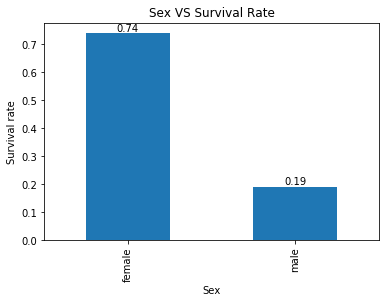

In [13]:
# 性别对存活率的影响

survived_rate_by_sex = survival_rate(passenger_df, 'Sex')
survived_rate_by_sex = survived_rate_by_sex.round(2)
bar_chart(survived_rate_by_sex, 'Sex VS Survival Rate', 'Survival rate')

In [14]:
# 计算各个性别的存活率，以年龄段分布，但是这里剔除了年龄为空的数据
survived_rate_by_age_male = survival_rate(age_and_sex[age_and_sex['Sex']=='male'],'Age_division')
survived_rate_by_age_male

Age_division
(0, 10]     0.575758
(10, 20]    0.144928
(20, 30]    0.154362
(30, 40]    0.230000
(40, 50]    0.218182
(50, 60]    0.142857
(60, 70]    0.071429
(70, 80]    0.200000
Name: Survived, dtype: float64

In [15]:
survived_rate_by_age_female = survival_rate(age_and_sex[age_and_sex['Sex']=='female'],'Age_division')
survived_rate_by_age_female

Age_division
(0, 10]     0.612903
(10, 20]    0.739130
(20, 30]    0.753086
(30, 40]    0.836364
(40, 50]    0.677419
(50, 60]    0.928571
(60, 70]    1.000000
(70, 80]         NaN
Name: Survived, dtype: float64

Populating the interactive namespace from numpy and matplotlib


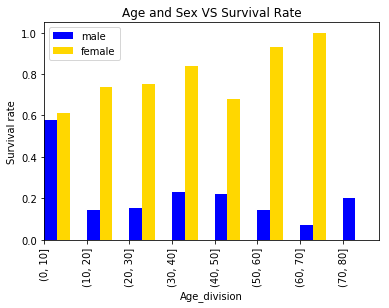

In [16]:
%pylab inline

bar_width = 0.3
survived_rate_by_age_male.plot(kind='bar', 
                               color=['blue'], 
                               label='male',
                               position=0,
                               width=bar_width)
survived_rate_by_age_female.plot(kind='bar', 
                                 color=['gold'],
                                 label='female',
                                 position=-1,
                                 width=bar_width)

plt.legend(labels=['male', 'female'])
plt.title('Age and Sex VS Survival Rate')
plt.ylabel('Survival rate')

问题2小结：
+ 船上以10-40岁（不含10岁）人群为主，但儿童（0-10岁）生还率最高（0.593750）
+ 船上男性人数高于女性，但女性生还率较男性明显高出许多
+ 结合年龄和性别来看，几乎各个年龄段，女性的生还率都比男性高（除70-80岁年龄段仅有男性）

# 问题3: 
# 有亲属同船的，是否生还率更高？
# 亲属越多生还率越高吗？

计算相关性(Pearson's r)

Populating the interactive namespace from numpy and matplotlib


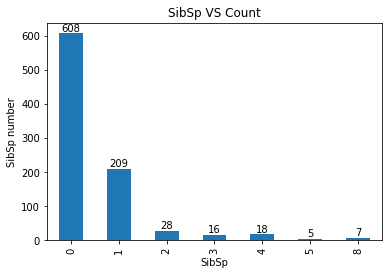

In [17]:
# 船上有兄弟姐妹配偶的人数分布
bar_chart(passenger_df.groupby('SibSp')['PassengerId'].count(), 
          'SibSp VS Count', 'SibSp number')

Populating the interactive namespace from numpy and matplotlib


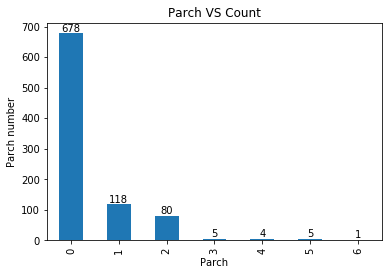

In [18]:
# 船上有父母子女的人数分布

bar_chart(passenger_df.groupby('Parch')['PassengerId'].count(), 
          'Parch VS Count', 'Parch number')

In [19]:
def correlation(x, y):
    x_in_std_units = (x - x.mean()) / x.std(ddof=0)
    y_in_std_units = (y - y.mean()) / y.std(ddof=0)
    correlation = (x_in_std_units * y_in_std_units).mean()
    return correlation

is_survived = passenger_df['Survived']
has_sibsp = passenger_df['SibSp']
has_parch = passenger_df['Parch']

print correlation(has_sibsp,is_survived)
print correlation(has_parch,is_survived)
print correlation(has_sibsp+has_parch,is_survived)

-0.0353224988857
0.0816294070835
0.0166389892827


In [20]:
group_by_relatives = passenger_df.groupby(['SibSp','Parch'],
                                          as_index=False).mean()
group_by_relatives[['SibSp','Parch','Survived']]

,SibSp,Parch,Survived
0,0,0,0.303538
1,0,1,0.657895
2,0,2,0.724138
3,0,3,1.000000
4,0,4,0.000000
5,0,5,0.000000
6,1,0,0.520325
7,1,1,0.596491
8,1,2,0.631579
9,1,3,0.333333


Populating the interactive namespace from numpy and matplotlib


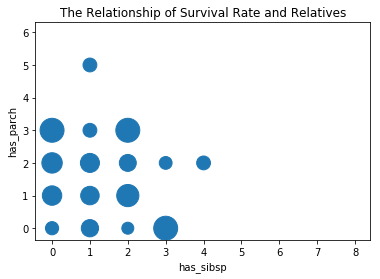

In [21]:
# scale the bubbles' size , by 200
scaled_survived = 200 * group_by_relatives['Survived'] / \
                  group_by_relatives['Survived'].std(ddof=0)

%pylab inline
plt.xlabel('has_sibsp')
plt.ylabel('has_parch')
plt.title('The Relationship of Survival Rate and Relatives')
plt.scatter(group_by_relatives['SibSp'], 
            group_by_relatives['Parch'],
            s=scaled_survived)

问题3小结：
+ 船上绝大多数人口是独身一人坐船，没有携带亲属
+ 根据相关性计算，有兄弟姐妹配偶的，反而生还率更低，但相关性很低（-0.0353224988857）
+ 根据相关性计算，有父母子女同船的，生还率稍有提高，但相关性仍较低（0.0816294070835）
+ 总体来讲，有亲属同船的，对生还率影响不显著（0.0166389892827）
+ 从最后一个图看出，并非亲属越多，生还率越高（5个及以上兄弟姐妹／配偶的，4个及以上父母子女的，生还率极低）
+ 从最后一个图看出，在已生还的人中，确实有亲属同船的人更多（圆圈越大表示生还率越高，上图中（0，0）点较其他点较小，没有圆圈表示生还率为0或不存在有该数量亲属的人）
+ 已生还的人中，有亲属同船的人更多，可能是由于其家庭出身高贵所致（问题1分析），同有亲属同船相关性不高

# 结论

## 社会地位
+ 人口以三等舱占多数
+ 生还率会随着船票等级（Pclass）的提高而提高
+ 船票等级__间接__反应乘客的社会地位，但不一定船票等级越高社会地位一定越高

## 年龄和性别
+ 人口性别上以男性占多数，年龄段上以10-40岁占多数
+ 女性生还率较男性有明显提高
+ 整体来看，儿童（0-10岁）生还率最高
+ 结果可能由于我的分组方式不同而产生差异（因为上次提交，是将0-80岁，以9岁为一个间隔做的划分，72-80岁的生还率较高，得出老人生还率高的结论），推测可能由于某个年龄的人口生还率较高，从而对其所在的年龄段生还率产生影响

## 有亲属同船
+ 人口以独身一人坐船占绝大多数
+ 是否有亲属同船，对生还率的影响不显著
+ 并非亲属越多，生还率越高
+ 但是在已生还的人中，确实有亲属的人更多，不排除可能是因为其出身好，社会地位更高等其他原因

## 分析中存在的其他限制
+ 根据[Kaggle](https://www.kaggle.com/c/titanic#description)上的描述，说明总人数为2224人，但是我们获取的数据只有891条，所以以上分析不能代表全部乘客和船员的真实情况：
> On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
